# Importing the image data generator library

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the parameters or arguments for image data generator class

In [4]:
# Initializing augmentation for training variable

train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2,shear_range=0.2,rotation_range=180,
                                   horizontal_flip=True)

In [5]:
# Initializing augmentation for testing variable

test_datagen = ImageDataGenerator(rescale=1/255)

# Applying image data generator functionality to trainset and test set

In [6]:
# Passing training data for training variable (augmentation)

xtrain = train_datagen.flow_from_directory('/content/Forest Fire Dataset/Training',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

Found 1520 images belonging to 2 classes.


In [7]:
# Passing testing data for testing variable (augmentation)

xtest = test_datagen.flow_from_directory('/content/Forest Fire Dataset/Testing',
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32)

Found 380 images belonging to 2 classes.


# Import the model building libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Initiating the model

In [4]:

model = Sequential() 

# Adding the cnn layers

In [5]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3))) # Convolution layer 
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer 
model.add(Flatten()) # Flatten layer 

# Adding dense layers

In [7]:
model.add(Dense(100,activation='relu')) # Hidden layer
model.add(Dense(1,activation='sigmoid')) # Output layer

# Configuring the learning process

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Train the model

In [11]:
model.fit_generator(xtrain,steps_per_epoch=len(xtrain),epochs=10,validation_data=xtest,validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
48/48 [==============================] - 20s 243ms/step - loss: 1.3899 - accuracy: 0.8184 - val_loss: 0.2291 - val_accuracy: 0.9263
Epoch 2/10
48/48 [==============================] - 11s 232ms/step - loss: 0.1877 - accuracy: 0.9276 - val_loss: 0.1634 - val_accuracy: 0.9447
Epoch 3/10
48/48 [==============================] - 11s 233ms/step - loss: 0.1859 - accuracy: 0.9368 - val_loss: 0.2110 - val_accuracy: 0.9158
Epoch 4/10
48/48 [==============================] - 11s 232ms/step - loss: 0.1744 - accuracy: 0.9434 - val_loss: 0.1840 - val_accuracy: 0.9211
Epoch 5/10
48/48 [==============================] - 11s 233ms/step - loss: 0.1658 - accuracy: 0.9441 - val_loss: 0.1671 - val_accuracy: 0.9316
Epoch 6/10
48/48 [==============================] - 11s 234ms/step - loss: 0.1894 - accuracy: 0.9276 - val_loss: 0.1511 - val_accuracy: 0.9421
Epoch 7/10
48/48 [==============================] - 11s 233ms/step - loss: 0.1609 - accuracy: 0.9428 - val_loss: 0.2177 - val_accuracy: 0.9237

# Save the model


In [20]:
model.save('Forest_fire.h5')

# Predictions

In [13]:
from tensorflow.keras.preprocessing import image  # Importing req. lib
import numpy as np


In [14]:
xtrain.class_indices

{'fire': 0, 'nofire': 1}

1/1 [==============================] - 0s 123ms/step
fire


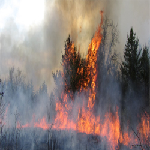

In [15]:
img = image.load_img('/content/Forest Fire Dataset/Testing/fire/fire_0275.jpg',target_size=(150,150))

x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = model.predict(x)
if(pred==0):
  print('fire')
else:
  print('no fire')
img

1/1 [==============================] - 0s 16ms/step
NO FIRE


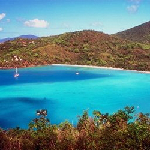

In [16]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0010.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 14ms/step
FIRE


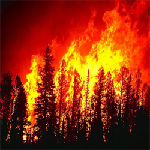

In [17]:

img = image.load_img('/content/Forest Fire Dataset/Testing/fire/fire_0910.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 16ms/step
NO FIRE


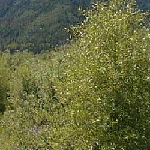

In [18]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0076.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img

1/1 [==============================] - 0s 17ms/step
NO FIRE


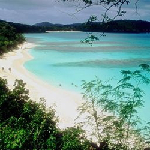

In [19]:
img = image.load_img('/content/Forest Fire Dataset/Testing/nofire/nofire_0006.jpg',target_size=(150,150))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = (model.predict(x))
if(pred==0):
  print('FIRE')
else:
  print('NO FIRE')
img